### **Exploratory Data Analysis**

In this workbook, we will discover some fundamental EDA techniques for text data:
- Distribution Plots
- xxx
- xxx

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_processed_full = pd.read_excel("amazon_review_processed_full.xlsx")
df_processed_full.head(5)

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,works great,easy install works great,True,0.0,False,...,2,38,11,3.875000,5.000000,3,0,Canon,works great easy install works great,1
1,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,slower speed im used old model 8600 new 9015e ...,True,0.0,False,...,4,460,23,4.835443,5.000000,19,0,HP,spunky mid size slower speed im used old model...,2
2,Canon PIXMA MG3620,Amazon,2023-03-15,Maria D,4,NaN,i,True,0.0,False,...,2,7,12,3.000000,5.500000,0,0,Canon,i,3
3,Epson - ET-3830,Amazon,2022-11-17,Ryan H,5,shag knows hes talking,yup slam upgrade paid little front equivalent ...,True,12.0,False,...,6,469,34,4.595238,4.833333,31,2,Epson,shag knows hes talking yup slam upgrade paid l...,4
4,HP ENVY 6055e,Amazon,2022-04-09,Sam,3,user friendly,would think something simple reconnecting wifi...,True,0.0,False,...,3,861,17,4.387500,5.000000,71,0,HP,user friendly would think something simple rec...,5


In [4]:
df_processed_full.describe()

,Review rating,People_find_helpful,list price,rating count,overall rating,content_word_count,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,ID
count,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000
mean,3.084729,4.683612,201.352083,11595.403076,4.161926,85.707807,5.045254,455.495543,27.783916,4.420507,5.049198,34.220492,1.247527,5105.000000
std,1.587869,23.275835,108.597911,17373.701014,0.099770,102.562293,3.567902,554.850041,19.129711,0.581190,1.610166,42.824573,1.632038,2947.228783
min,1.000000,0.000000,79.990000,285.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,129.990000,1896.000000,4.100000,24.000000,2.000000,126.000000,14.000000,4.111111,4.000000,8.000000,0.000000,2553.000000
50%,3.000000,0.000000,159.990000,4338.000000,4.100000,54.000000,4.000000,285.000000,23.000000,4.365854,4.750000,21.000000,1.000000,5105.000000
75%,5.000000,3.000000,239.990000,9872.000000,4.200000,109.000000,7.000000,574.000000,36.000000,4.642857,5.750000,44.000000,2.000000,7657.000000
max,5.000000,990.000000,549.990000,53646.000000,4.400000,1439.000000,25.000000,8042.000000,127.000000,10.000000,22.000000,597.000000,12.000000,10209.000000


#### <font color=#FFB703> **Grouping into Positive / Negative** </font>

In [35]:
def categorize_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df_processed_full['Rating Category'] = df_processed_full['Review rating'].apply(categorize_rating)

#### <font color=#FFB703> **Distribution Plots** </font>

<font color=#61BEB0>**Average number of token words (by positive / negative rating):**</font>

In [37]:
# Tokenisation (Review Content)
df_processed_full['Tokenized Content'] = df_processed_full['Review Content'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed_full[['Review Content', 'Tokenized Content']].head(5)

,Review Content,Tokenized Content
0,easy install works great,"[easy, install, works, great]"
1,slower speed im used old model 8600 new 9015e ...,"[slower, speed, im, used, old, model, 8600, ne..."
2,i,[i]
3,yup slam upgrade paid little front equivalent ...,"[yup, slam, upgrade, paid, little, front, equi..."
4,would think something simple reconnecting wifi...,"[would, think, something, simple, reconnecting..."


In [68]:
# Tokenisation (Review title)
# df_processed_full['Tokenized title'] = df_processed_full['Review title'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
# df_processed_full[['Review title', 'Tokenized Content']].head(5)

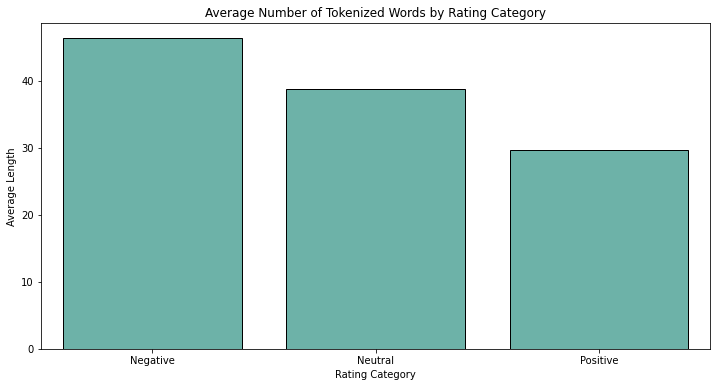

In [49]:
avg_lengths = df_processed_full.groupby('Rating Category')['Avg Token Words'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating Category', y='Avg Token Words', data=avg_lengths, color = '#61BEB0', edgecolor = 'black')
plt.title('Average Number of Tokenized Words by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Length')
plt.show()

<font color=#61BEB0>**Average number of characters:**</font>

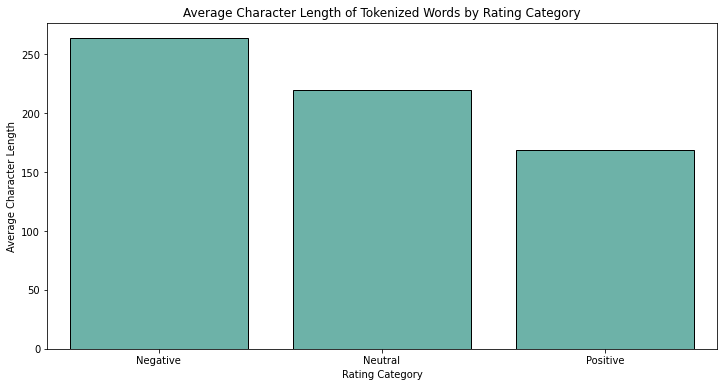

In [51]:
df_processed_full['Avg Char Length'] = df_processed_full['Tokenized Content'].apply(lambda x: sum(len(word) for word in x))

avg_lengths = df_processed_full.groupby('Rating Category')['Avg Char Length'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating Category', y='Avg Char Length', data=avg_lengths, color = '#61BEB0', edgecolor = 'black')
plt.title('Average Character Length of Tokenized Words by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Character Length')
plt.show()

<font color=#61BEB0>**Overall Rating Distribution:**</font>

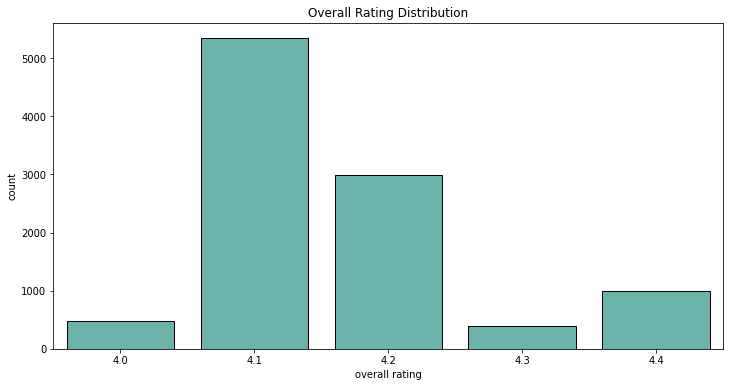

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='overall rating', data=df_processed_full, color = '#61BEB0', edgecolor = 'black')
plt.title('Overall Rating Distribution')
plt.show()

<font color=#61BEB0>**Review Distribution:**</font>

In [ ]:
df_processed_full["Review rating"].value_counts()

5    3011
1    2663
4    1642
2    1473
3    1420
Name: Review rating, dtype: int64

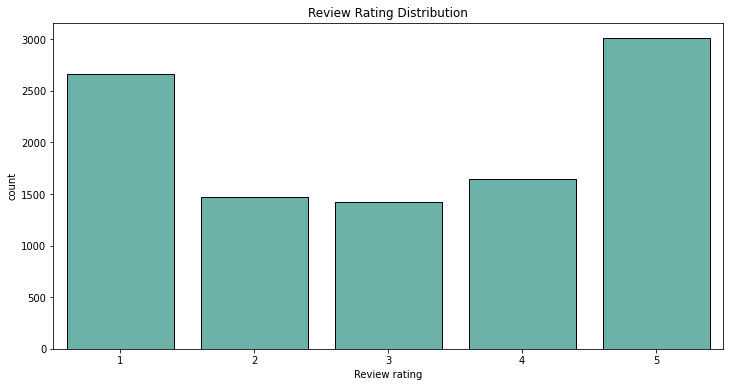

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Review rating', data=df_processed_full, color = '#61BEB0', edgecolor = 'black')
plt.title('Review Rating Distribution')
plt.show()

<AxesSubplot:xlabel='Review rating'>

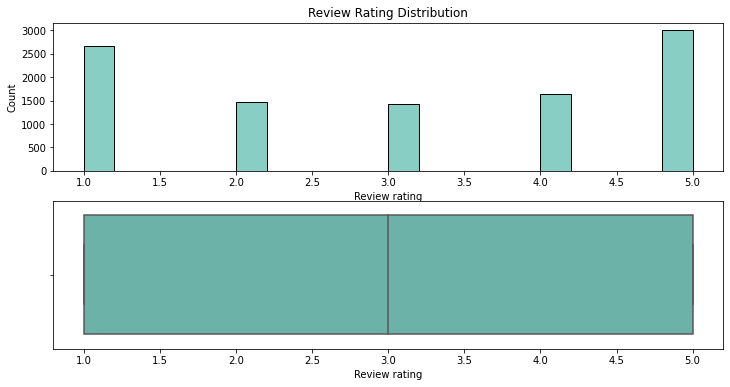

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df_processed_full['Review rating'], bins=20, kde=False, color = '#61BEB0')
plt.title('Review Rating Distribution')
plt.subplot(2, 1, 2)
sns.boxplot(x='Review rating', data=df_processed_full, color = '#61BEB0')

<font color=#61BEB0>**Rating Count Distribution:**</font>

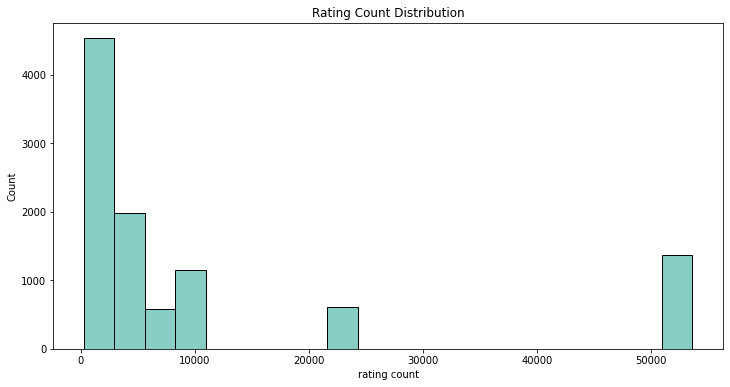

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['rating count'], bins=20, kde=False, color = '#61BEB0')
plt.title('Rating Count Distribution')
plt.show()

<font color=#61BEB0>**Word Distribution:**</font>

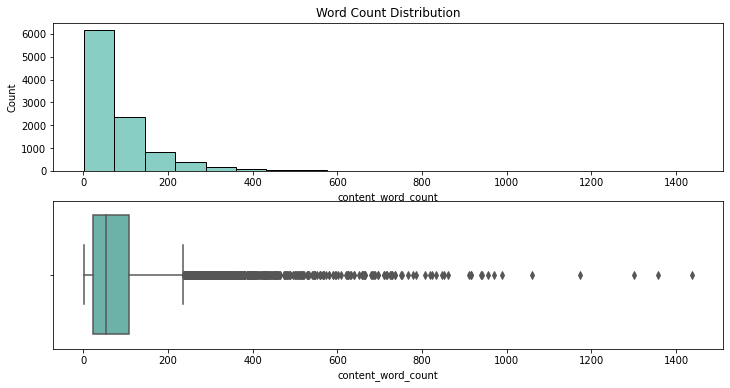

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df_processed_full['content_word_count'], bins=20, kde=False, color = '#61BEB0')
plt.title('Word Count Distribution')
plt.subplot(2, 1, 2)
sns.boxplot(x='content_word_count', data=df_processed_full, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**Verified Purchase Distribution:**</font>

C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


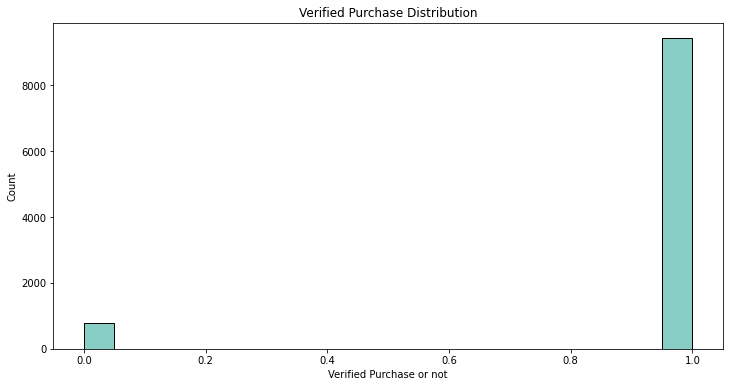

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['Verified Purchase or not'], bins=20, kde=False, color = '#61BEB0')
plt.title('Verified Purchase Distribution')
plt.show()

<font color=#61BEB0>**Vine or Not Distribution:**</font>

C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


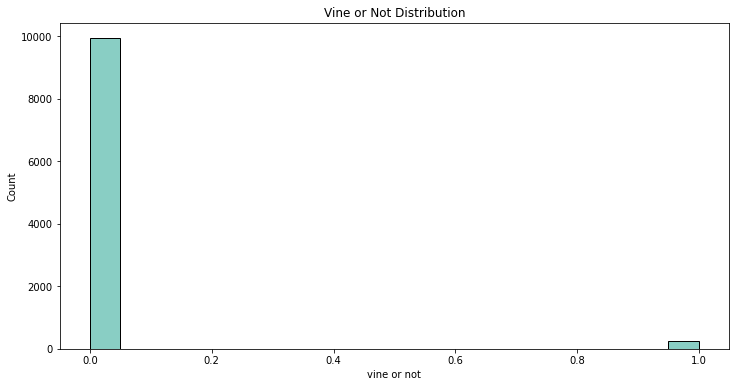

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['vine or not'], bins=20, kde=False, color = '#61BEB0')
plt.title('Vine or Not Distribution')
plt.show()

<font color=#61BEB0>**Review Date Distribution:**</font>

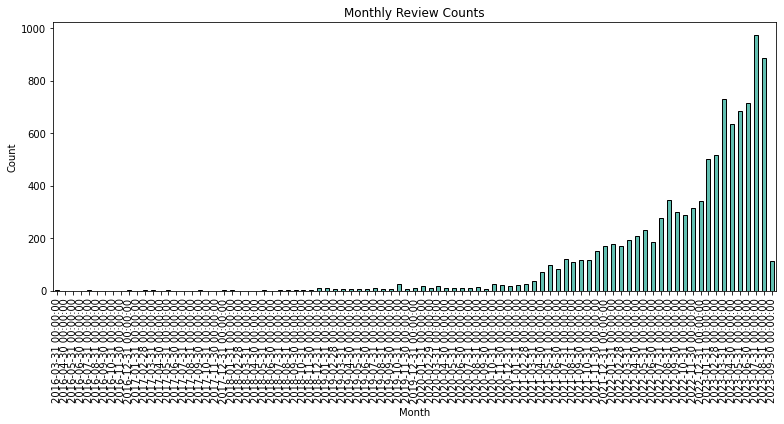

In [23]:
df_processed_full['Review date'] = pd.to_datetime(df_processed_full['Review date'])
df_time = df_processed_full.set_index('Review date')
monthly_counts = df_time.resample('M').size()

plt.figure(figsize=(11, 6))
monthly_counts.plot(kind='bar', color = '#61BEB0', edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Review Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<font color=#61BEB0>**Correlation Heatmap:**</font>

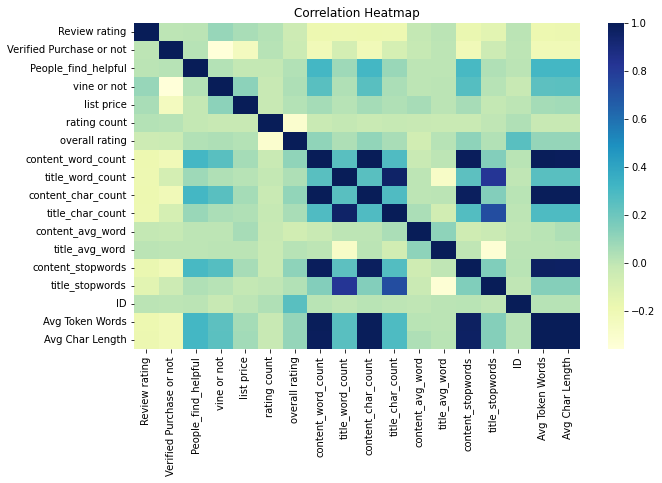

In [62]:
correlation_matrix = df_processed_full.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu') # Change annot to True to see values
plt.title('Correlation Heatmap')
plt.show()

<font color=#61BEB0>**People Find Helpful Distribution:**</font>

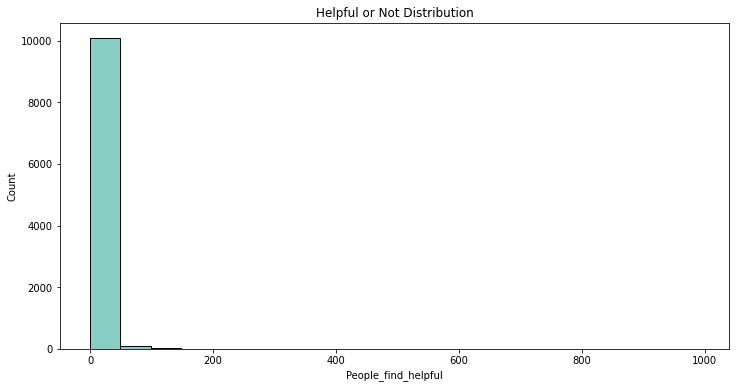

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['People_find_helpful'], bins=20, kde=False, color = '#61BEB0')
plt.title('Helpful or Not Distribution')
plt.show()

<font color=#61BEB0>**List Price Distribution:**</font>

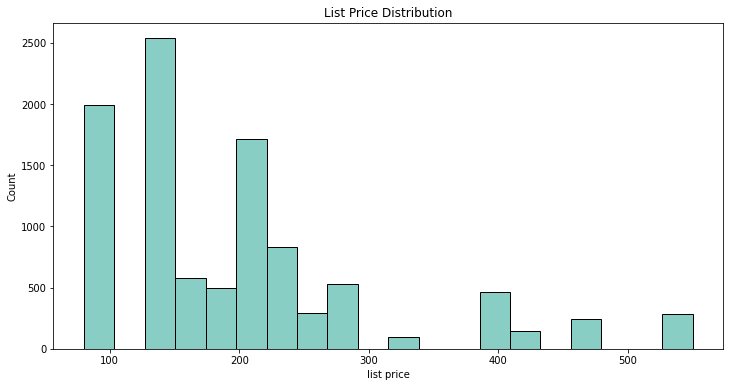

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['list price'], bins=20, kde=False, color = '#61BEB0')
plt.title('List Price Distribution')
plt.show()